# Кудрявцев С.Д. ИУ5-62Б РК №2


In [1]:
#Read the csv file
import pandas as pd

review=pd.read_csv('Amazon_text.csv')

review['Label']=review['Label'].map({'__label__2 ':1,'__label__1 ':0}) #label column change the values 0 and 1
review


,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [2]:
#Spliting the Data
from sklearn.model_selection import train_test_split
y=review['Label']
review.drop(columns='Label',axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split(review,y,random_state=42,test_size=0.2)
x_train


,Review
183,Just a few.: These are the handful of tracks ...
38,Doesn't work on a Mac: It clearly says on lin...
24,i liked this album more then i thought i woul...
142,Not Patterns - but Detailed Sketches: Althoug...
141,A Contemporary Fairytale Sure to Delight!: Wh...
...,...
106,Very authentic: This is my first encounter wi...
14,Awful beyond belief!: I feel I have to write ...
92,OMG Soulwax owns: wow - this is like the most...
179,Yet another unsubstantiated case....: While I...


In [0]:
# performed tokenization,stopwords removal,stemming/lemmatization
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

tokenizer=RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemmas_tokens=[lemmatizer.lemmatize(pure_tokens) for pure_tokens in pure_tokens]
    
    final_tokens=final_tokens.join(lemmas_tokens)
    
    return final_tokens

x_train['cleaned_text']=x_train['Review'].apply(preprocessing)
x_train['cleaned_text']



In [4]:
#Build the Document Matrix Using TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

x_train_TfIdf=vectorizer.fit_transform(x_train['Review'])
x_test_TfIdf=vectorizer.transform(x_test['Review'])

vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>

In [5]:
cv=TfidfVectorizer()
print(cv.fit_transform(review['Review']))

  (0, 1715)	0.12010700477569902
  (0, 450)	0.15957336272586528
  (0, 175)	0.10221117034173638
  (0, 1478)	0.1480301930054225
  (0, 2028)	0.15957336272586528
  (0, 2702)	0.15957336272586528
  (0, 1314)	0.1480301930054225
  (0, 1288)	0.15957336272586528
  (0, 3245)	0.05835630293863591
  (0, 2765)	0.1480301930054225
  (0, 1191)	0.15957336272586528
  (0, 2853)	0.13348751903726225
  (0, 159)	0.06686523791325975
  (0, 1620)	0.15957336272586528
  (0, 696)	0.15957336272586528
  (0, 1197)	0.0668187445061978
  (0, 246)	0.12390850457740515
  (0, 257)	0.15957336272586528
  (0, 318)	0.09263215588187926
  (0, 1341)	0.07222908813022635
  (0, 988)	0.10628510245636406
  (0, 1219)	0.1167538443098966
  (0, 131)	0.06574431663928758
  (0, 1994)	0.07524822120571494
  (0, 2045)	0.07728748635973035
  :	:
  (198, 312)	0.14688884356876283
  (198, 1962)	0.06530774376032421
  (198, 146)	0.2358080425576224
  (198, 1610)	0.09592667653406346
  (198, 2752)	0.13724395728434696
  (198, 662)	0.12140776005141317
  (198, 

In [0]:
#build a navie bayes classifier model
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt


In [8]:
#Build a DecisionTree
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train_TfIdf,y_train)
y_pred_dec=decision.predict(x_test_TfIdf)
y_pred_dec

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [9]:
deccm=confusion_matrix(y_test,y_pred_dec)
deccm

array([[ 8,  7],
       [ 5, 20]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


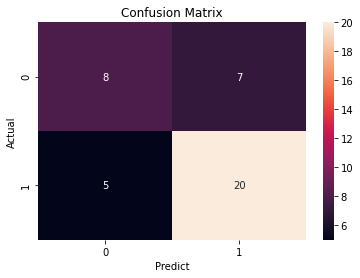

In [11]:
import seaborn as sns
sns.heatmap(deccm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
dt=accuracy_score(y_test,y_pred_dec)
dt

0.7

In [14]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(oob_score=True)
random.fit(x_train_TfIdf,y_train)
y_pred_random=random.predict(x_test_TfIdf)
y_pred_random

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
rfcm=confusion_matrix(y_test,y_pred_random)
rfcm

array([[ 5, 10],
       [ 0, 25]])

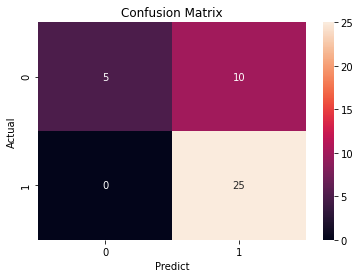

In [16]:
sns.heatmap(rfcm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
rf=accuracy_score(y_test,y_pred_random)
rf

0.75

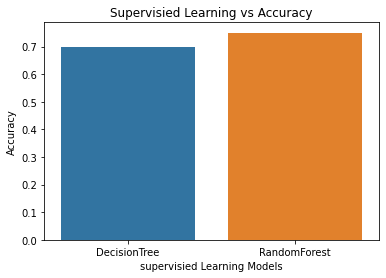

In [18]:
#visualizing the accuracy score for models

check=["DecisionTree","RandomForest"]
overall_accuracy=[dt,rf]

sns.barplot(x=check,y=overall_accuracy)
plt.xlabel('supervisied Learning Models')
plt.ylabel('Accuracy')
plt.title('Supervisied Learning vs Accuracy')
plt.show()


Для моего набора данных модель случайного леса работает лучше.
